# <b> *Mercedes Benz Greener Manufacturing* </b>
## <b> *Part1: Data Exploration, EDA and Data Cleaning* </b>
### <b> *Please check Part2 on Data Preparation and Modeling* </b>

***
<b> DESCRIPTION </b>

Reduce the time a Mercedes-Benz spends on the test bench.

<b> Problem Statement Scenario:</b>
***
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

- If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
- Check for null and unique values for test and train sets.
- Apply label encoder.
- Perform dimensionality reduction.
- Predict your test_df values using XGBoost.

## *Import the Libraries*

In [1]:
#os specifics and versions
import os
import sys
assert sys.version_info >= (3,5)
#arrays and dataframes operations 
import numpy as np
import pandas as pd
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline 
#consistent plot sizes
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#utilities to load the data
from zipfile import ZipFile
#To accommodate maximum number of colums in Jupyter
pd.options.display.max_columns = False
#statistical package
import statistics

In [2]:
#set up location & format to save the figures
PROJECT_ROOT_DIR = '.'
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR,'Images')
os.makedirs(IMAGE_PATH,exist_ok=True)

#function to save the figure - with default values for some arguments
def save_fig(figname,tight_layout=True,fig_extension='png',resolution=300):
    path = os.path.join(IMAGE_PATH,figname+'.'+fig_extension)
    print('Saving your figure ... %s'%(figname))
    if tight_layout:
        plt.tight_layout()
    #save the figure
    plt.savefig(path,format=fig_extension,dpi=resolution)
    print('Your figure is saved !')

In [3]:
#Finding the version of libraries we are using
print("Panda version : {0}".format(pd.__version__))
print("Seaborn version : {0}".format(sns.__version__))
print("Numpy version : {0}".format(np.__version__))

Panda version : 1.0.3
Seaborn version : 0.10.0
Numpy version : 1.18.2


## *Load the Data*

In [4]:
#specifying the zip file name
train_filename = 'train.zip'
test_filename = 'test.zip'
files = [train_filename,test_filename]
#extract the csv files from the zip folders
for filename in files:
    if (os.path.exists(filename)):
        with ZipFile (filename,'r') as zip:
            
            #print all the contents of the zip file                
            zip.printdir()
            #extracting all the files
            print('Extracting all the files under %s' %(filename))
            zip.extractall()
            print('Done !!')
            #clear the space by removing the zip folder
            os.remove(filename)
    else:
        print('File %s has already been unzipped'%(filename))

File train.zip has already been unzipped
File test.zip has already been unzipped


In [5]:
#list all the files post unzip
os.listdir()

['train_clean.csv',
 'train.csv',
 'rf_submission.csv',
 'mercbenz_xgb.csv',
 'Part2_Data_Preparation.ipynb',
 'Images',
 'test.csv',
 'Part_1_EDA_Mercedes_Benz.ipynb',
 'Housing_Sayan.ipynb',
 '.ipynb_checkpoints',
 'test_prediction.csv',
 'test_clean.csv']

train.csv and test.csv are the files to be used as dataset for the current problem. 

In [6]:
#load the train and test data
train = pd.read_csv('train.csv',delimiter=',',engine='python')
test = pd.read_csv('test.csv',delimiter=',',engine='python')

## *Basic Data Exploration*

In [7]:
#check the few rows of train and test data
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


There are 378 columns in train data and 377 in the test data which does not have the label y as expected.

In [9]:
#check the info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


There are way too many columns to be listed in the info. The total number of observations in the train set is 4209 and 4209 entries in the test set. There are 8 features which are of object type and the rest are all numerical with dtype as int/float.

In [11]:
#check basic summary statistics of the target value y
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [12]:
#check for the null values in the columns in descending order 
train.isnull().sum().sort_values(ascending=False)

X385    0
X132    0
X123    0
X124    0
X125    0
       ..
X259    0
X260    0
X261    0
X262    0
ID      0
Length: 378, dtype: int64

In [13]:
#check for null values in the test folder
test.isna().sum().sort_values(ascending=False)

X385    0
X132    0
X123    0
X124    0
X125    0
       ..
X259    0
X260    0
X261    0
X262    0
ID      0
Length: 377, dtype: int64

In [14]:
#check the sum of null values of all the columns, will return 0 if there are no null values
train.isnull().sum().sum()

0

In [15]:
test.isnull().sum().sum()

0

<b> *There are no null values in the train and test dataset* </b>

In [16]:
#print the column names
train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [17]:
#create a list of all categorical features
train_cat_features =  train.select_dtypes(include='object').columns.tolist()
test_cat_features =   test.select_dtypes(include='object').columns.tolist()

In [18]:
train_cat_features

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [19]:
test_cat_features

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

Both the train and test dataset have the same features which are of type categorical.

In [20]:
#check for the unique values
for col in train_cat_features:
    print('%s: %d'%(col,len(train[col].unique())))

X0: 47
X1: 27
X2: 44
X3: 7
X4: 4
X5: 29
X6: 12
X8: 25


In [21]:
#check for the unique values in the test dataset
for col in test_cat_features:
    print('%s: %d'%(col,len(test[col].unique())))

X0: 49
X1: 27
X2: 45
X3: 7
X4: 4
X5: 32
X6: 12
X8: 25


<b> *The test dataset has features which have more unique values than the train dataset. If we use the train dataset then for the values in test dataset which does not exist in the train set might not get predicted/generalized well.* </b>

In [22]:
#check the shape of train and test 
print('train shape:{}'.format(train.shape))
print('test shape:{}'.format(test.shape))

train shape:(4209, 378)
test shape:(4209, 377)


## *Exploratory Data Analysis*
***
From here, train set would be explored and test set would only be used based on the defined preprocesses in the pipeline and finally for prediction.
***


In [23]:
#Column ID is not a feature but an identifier of a test object 
train['ID'] = train['ID'].astype(str)
test['ID'] =  test['ID'].astype(str)

In [24]:
#create list of integer columns
train_int_features = train.select_dtypes(include='int64').columns.tolist()
test_int_features =  test.select_dtypes(include='int64').columns.tolist()

### *Check for variance in the features*

In [25]:
#check for the variance in the train dataset
train_zero_var_features = []
for feature in train_int_features:
    #calculate the variance of the feature
    variance = statistics.variance(train[feature])
    if (variance == 0.0):
        print(f'Variance of {feature} is {variance}')
        train_zero_var_features.append(feature)
        #print('Feature %s Variance: %.2f'%(feature,statistics.variance(train[feature])))
    else:
        continue
print(train_zero_var_features)

Variance of X11 is 0
Variance of X93 is 0
Variance of X107 is 0
Variance of X233 is 0
Variance of X235 is 0
Variance of X268 is 0
Variance of X289 is 0
Variance of X290 is 0
Variance of X293 is 0
Variance of X297 is 0
Variance of X330 is 0
Variance of X347 is 0
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [26]:
#check for the variance in the test dataset 
test_zero_var_features = []
for feature in test_int_features:
    #calculate the variance of the feature
    variance = statistics.variance(test[feature])
    if (variance == 0.0):
        print(f'Variance of {feature} is {variance}')
        test_zero_var_features.append(feature)
        #print('Feature %s Variance: %.2f'%(feature,statistics.variance(train[feature])))
    else:
        continue
print(test_zero_var_features)

Variance of X257 is 0
Variance of X258 is 0
Variance of X295 is 0
Variance of X296 is 0
Variance of X369 is 0
['X257', 'X258', 'X295', 'X296', 'X369']


<b> *The variables in the train set and test dataset have different columns which have zero variances* </b>


In [27]:
#check the unique values in the columns with zero variance
for col in train_zero_var_features:
    print(f'Unique values in {col}')
    print(f'test dataset:{test[col].unique()}')
    print(f'train dataset:{train[col].unique()}')

Unique values in X11
test dataset:[0 1]
train dataset:[0]
Unique values in X93
test dataset:[0 1]
train dataset:[0]
Unique values in X107
test dataset:[0 1]
train dataset:[0]
Unique values in X233
test dataset:[0 1]
train dataset:[0]
Unique values in X235
test dataset:[0 1]
train dataset:[0]
Unique values in X268
test dataset:[0 1]
train dataset:[0]
Unique values in X289
test dataset:[0 1]
train dataset:[0]
Unique values in X290
test dataset:[0 1]
train dataset:[0]
Unique values in X293
test dataset:[0 1]
train dataset:[0]
Unique values in X297
test dataset:[0 1]
train dataset:[0]
Unique values in X330
test dataset:[0 1]
train dataset:[0]
Unique values in X347
test dataset:[0 1]
train dataset:[0]


In [28]:
#check the unique values in the columns with zero variance
for col in test_zero_var_features:
    print(f'Unique values in {col}')
    print(f'test dataset:{test[col].unique()}')
    print(f'train dataset:{train[col].unique()}')

Unique values in X257
test dataset:[0]
train dataset:[0 1]
Unique values in X258
test dataset:[0]
train dataset:[0 1]
Unique values in X295
test dataset:[0]
train dataset:[0 1]
Unique values in X296
test dataset:[0]
train dataset:[0 1]
Unique values in X369
test dataset:[0]
train dataset:[0 1]


<b> *The unique values in the train dataset and test dataset for which the reported variance is 0 have only one unique value which is 0!!* </b>

In [29]:
#check for duplicate rows 
train.duplicated().sum()

0

<b> *There are NO duplicate rows in the dataset* </b>

### *Explore the response variable y*

In [30]:
#check the variance
statistics.variance(train['y'])

160.76670968227825

Saving your figure ... Histogram(y)
Your figure is saved !


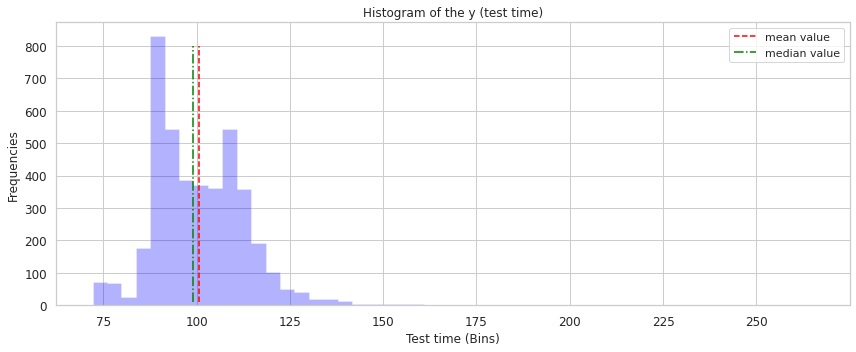

In [31]:
#plot the histogram
plt.hist(train['y'],histtype='stepfilled',color='blue',alpha=0.3,bins=50)
plt.title('Histogram of the y (test time)')
plt.xlabel('Test time (Bins)')
plt.ylabel('Frequencies')
mean = np.mean(train['y'])
median = np.median(train['y'])
plt.vlines(x=mean,ymin=10.0,ymax=800.0,color='red',linestyles='dashed',label='mean value')
plt.vlines(x=median,ymin=10.0,ymax=800.0,color='green',linestyles='dashdot',label='median value')
plt.legend()
save_fig('Histogram(y)')
plt.show()

*The mean and median are very close to each other. The distribution of the response variable appears to be approximately normal. There appears to be be two clusters. One where the test time is between ~85 to 100 and other where it is between 100 to ~120. There are also a few vehicles where the test time was quite high (above 120) and also lower than 75.* 

Saving your figure ... response_variable_values
Your figure is saved !


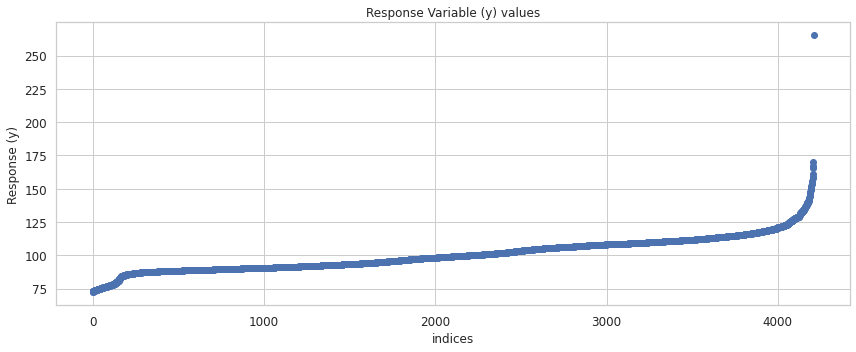

In [32]:
#check the values of y
plt.scatter(range(train.shape[0]),np.sort(train.y.values))
plt.xlabel('indices')
plt.ylabel('Response (y)')
plt.title('Response Variable (y) values')
save_fig('response_variable_values')
plt.show()

***There is one value is way out of the others.***

Saving your figure ... Histogram(y)_logscale
Your figure is saved !


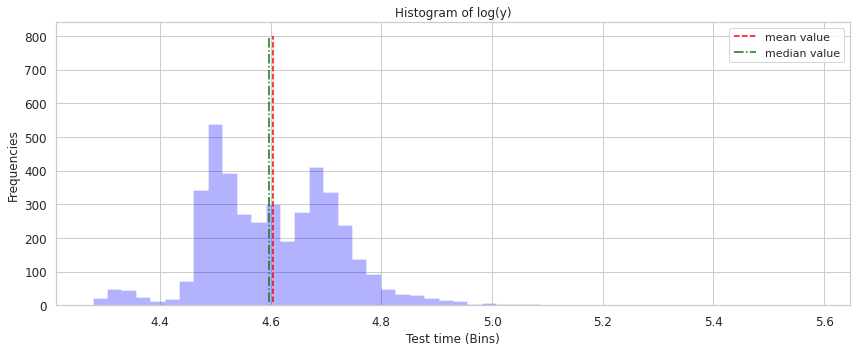

In [33]:
#plot the histogram
plt.hist(np.log(train['y']),histtype='stepfilled',color='blue',alpha=0.3,bins=50)
plt.title('Histogram of log(y)')
plt.xlabel('Test time (Bins)')
plt.ylabel('Frequencies')
mean = np.mean(np.log(train['y']))
median = np.median(np.log(train['y']))
plt.vlines(x=mean,ymin=10.0,ymax=800.0,color='red',linestyles='dashed',label='mean value')
plt.vlines(x=median,ymin=10.0,ymax=800.0,color='green',linestyles='dashdot',label='median value')
plt.legend()
save_fig('Histogram(y)_logscale')
plt.show()

***Histogram of log(y) clearly shows that there are two clusters of y, one on either side of the mean/median value. The histogram is clearly bimodal.*** 

### *Check for correlations*

In [34]:
#check for correlations
train.corr()['y'].sort_values(ascending=False)

y       1.000000
X314    0.606005
X261    0.588785
X263    0.379629
X136    0.368177
          ...   
X290         NaN
X293         NaN
X297         NaN
X330         NaN
X347         NaN
Name: y, Length: 369, dtype: float64

***The NaN values appear in the correlations for all those features which have variance as 0. These features are*** ```train_zero_var_features``` 
```'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347' ```

Saving your figure ... UniqueValues_Numerical
Your figure is saved !


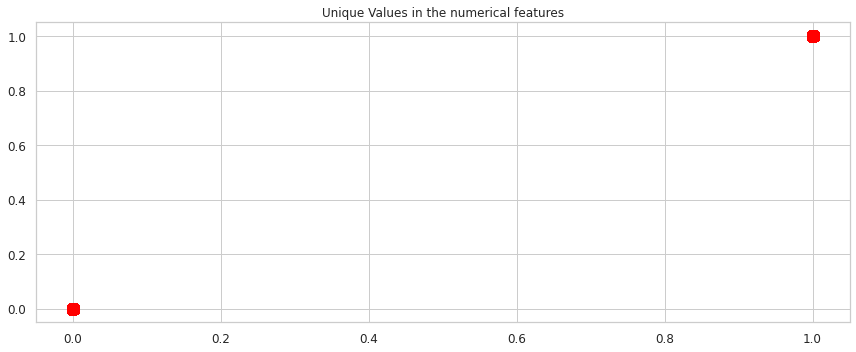

In [35]:
#check the unique values in all the integer columns
for col in train_int_features:
    plt.plot(np.unique(train[col]),'bo',color='red',markersize=12)
plt.title('Unique Values in the numerical features')
save_fig('UniqueValues_Numerical')
plt.show()


***So either the unique value is 0 or 1 for all the numerical features. Also, during data cleaning the features which have zero variance should be removed as these are useless in creating the predictive model.***

Saving your figure ... Correlations_1
Your figure is saved !


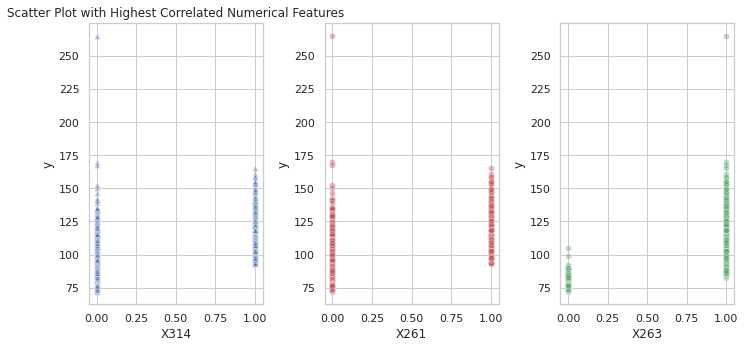

In [36]:
#plot the correlations with the top 3 correlated features 
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
plt.subplot(131)
sns.scatterplot(x='X314',y='y',data=train,marker='^',color='b',alpha=0.4)
plt.title('Scatter Plot with Highest Correlated Numerical Features')
plt.subplot(132)
sns.scatterplot(x='X261',y='y',data=train,color='r',alpha=0.4)
plt.subplot(133)
sns.scatterplot(x='X263',y='y',data=train,color='g',alpha=0.4)
plt.subplots_adjust(hspace=0.9)
save_fig('Correlations_1')
plt.show()

***For all the 3 top correlated features, the y value has an extreme value which is above 250. Probably due to this extreme value the correlations appear to be so high.***

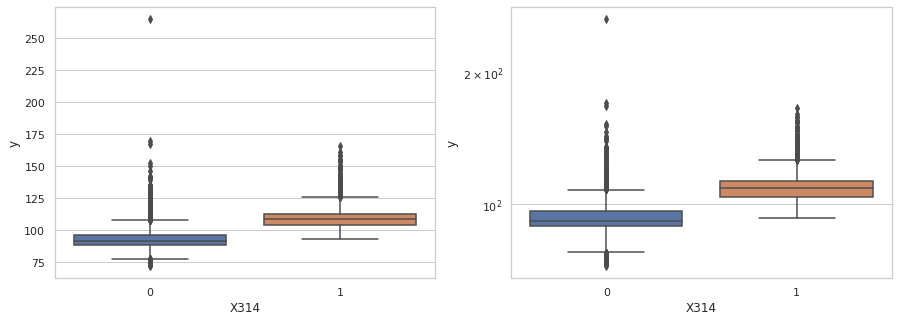

In [37]:
#boxplot the y value against the highest correlated feature 
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x='X314', y='y', data=train)
plt.subplot(122)
sns.boxplot(x='X314', y='y', data=train)
plt.yscale('log')
plt.subplots_adjust(hspace=0.9)
plt.show()

In [38]:
#check the cat features in train
train_cat_features

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

Saving your figure ... boxplot_catX0
Your figure is saved !


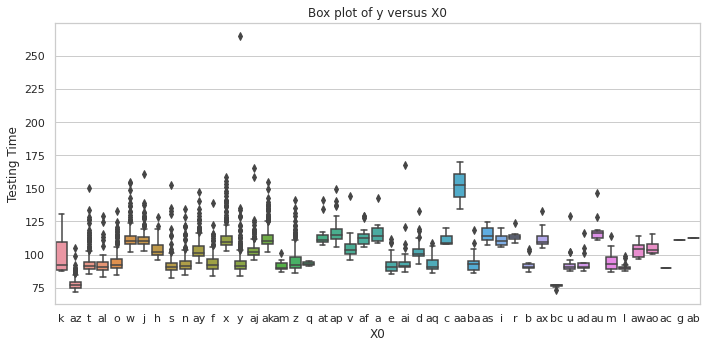

Saving your figure ... boxplot_catX1
Your figure is saved !


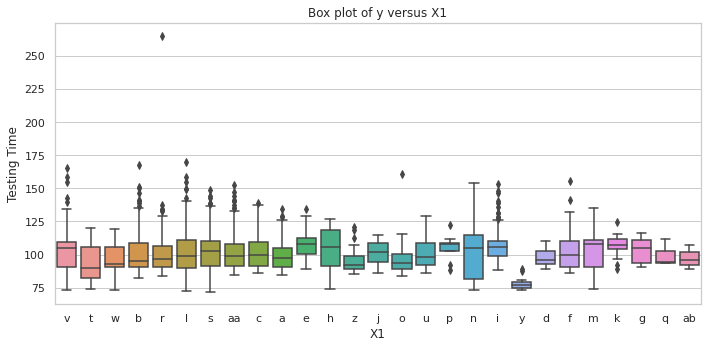

Saving your figure ... boxplot_catX2
Your figure is saved !


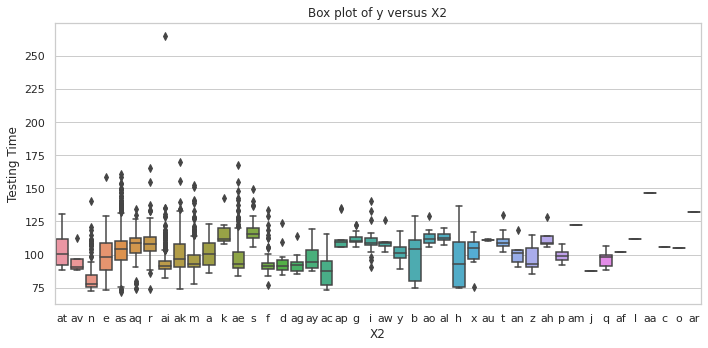

Saving your figure ... boxplot_catX3
Your figure is saved !


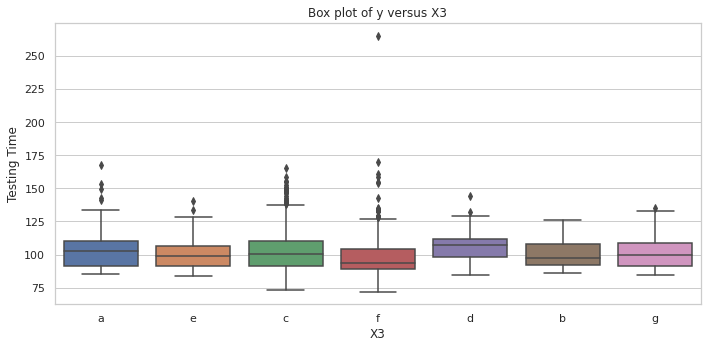

Saving your figure ... boxplot_catX4
Your figure is saved !


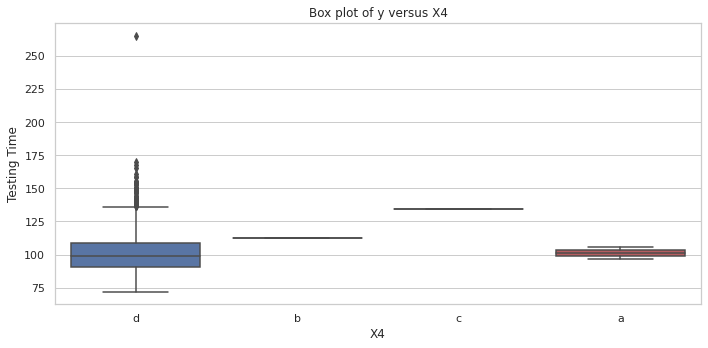

Saving your figure ... boxplot_catX5
Your figure is saved !


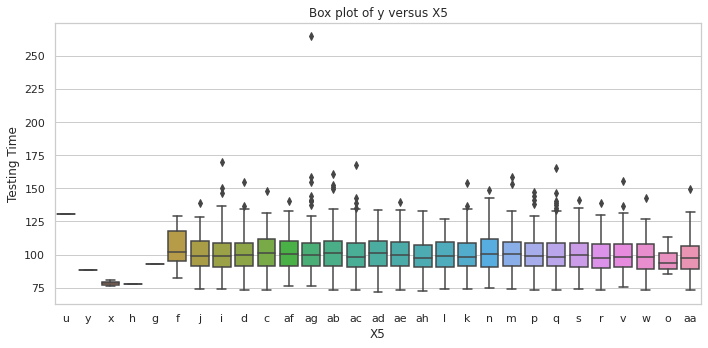

Saving your figure ... boxplot_catX6
Your figure is saved !


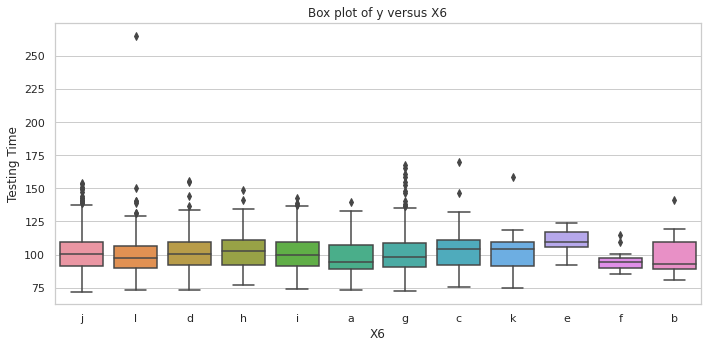

Saving your figure ... boxplot_catX8
Your figure is saved !


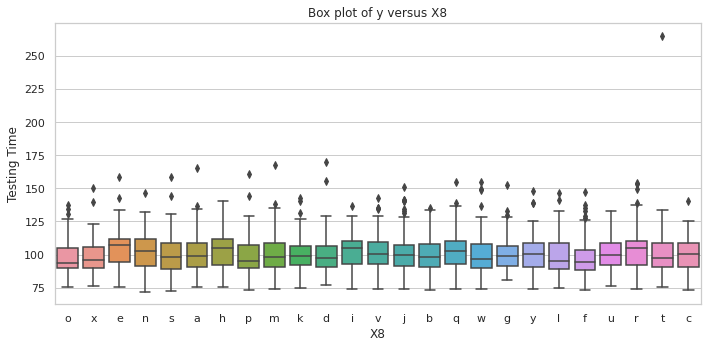

In [39]:
#Boxplot of y versus all the categorical features
for cat_feature in train_cat_features:
    #plt.style.use('ggplot')
    plt.figure(figsize=(10,5))
    sns.boxplot(x=cat_feature,y='y',data=train)
    plt.title(f'Box plot of y versus {cat_feature}')
    plt.ylabel('Testing Time')
    save_fig('boxplot_cat'+cat_feature)
    plt.show()

***In general there is a strong relationship between the y and the categorical features in the train dataset.***

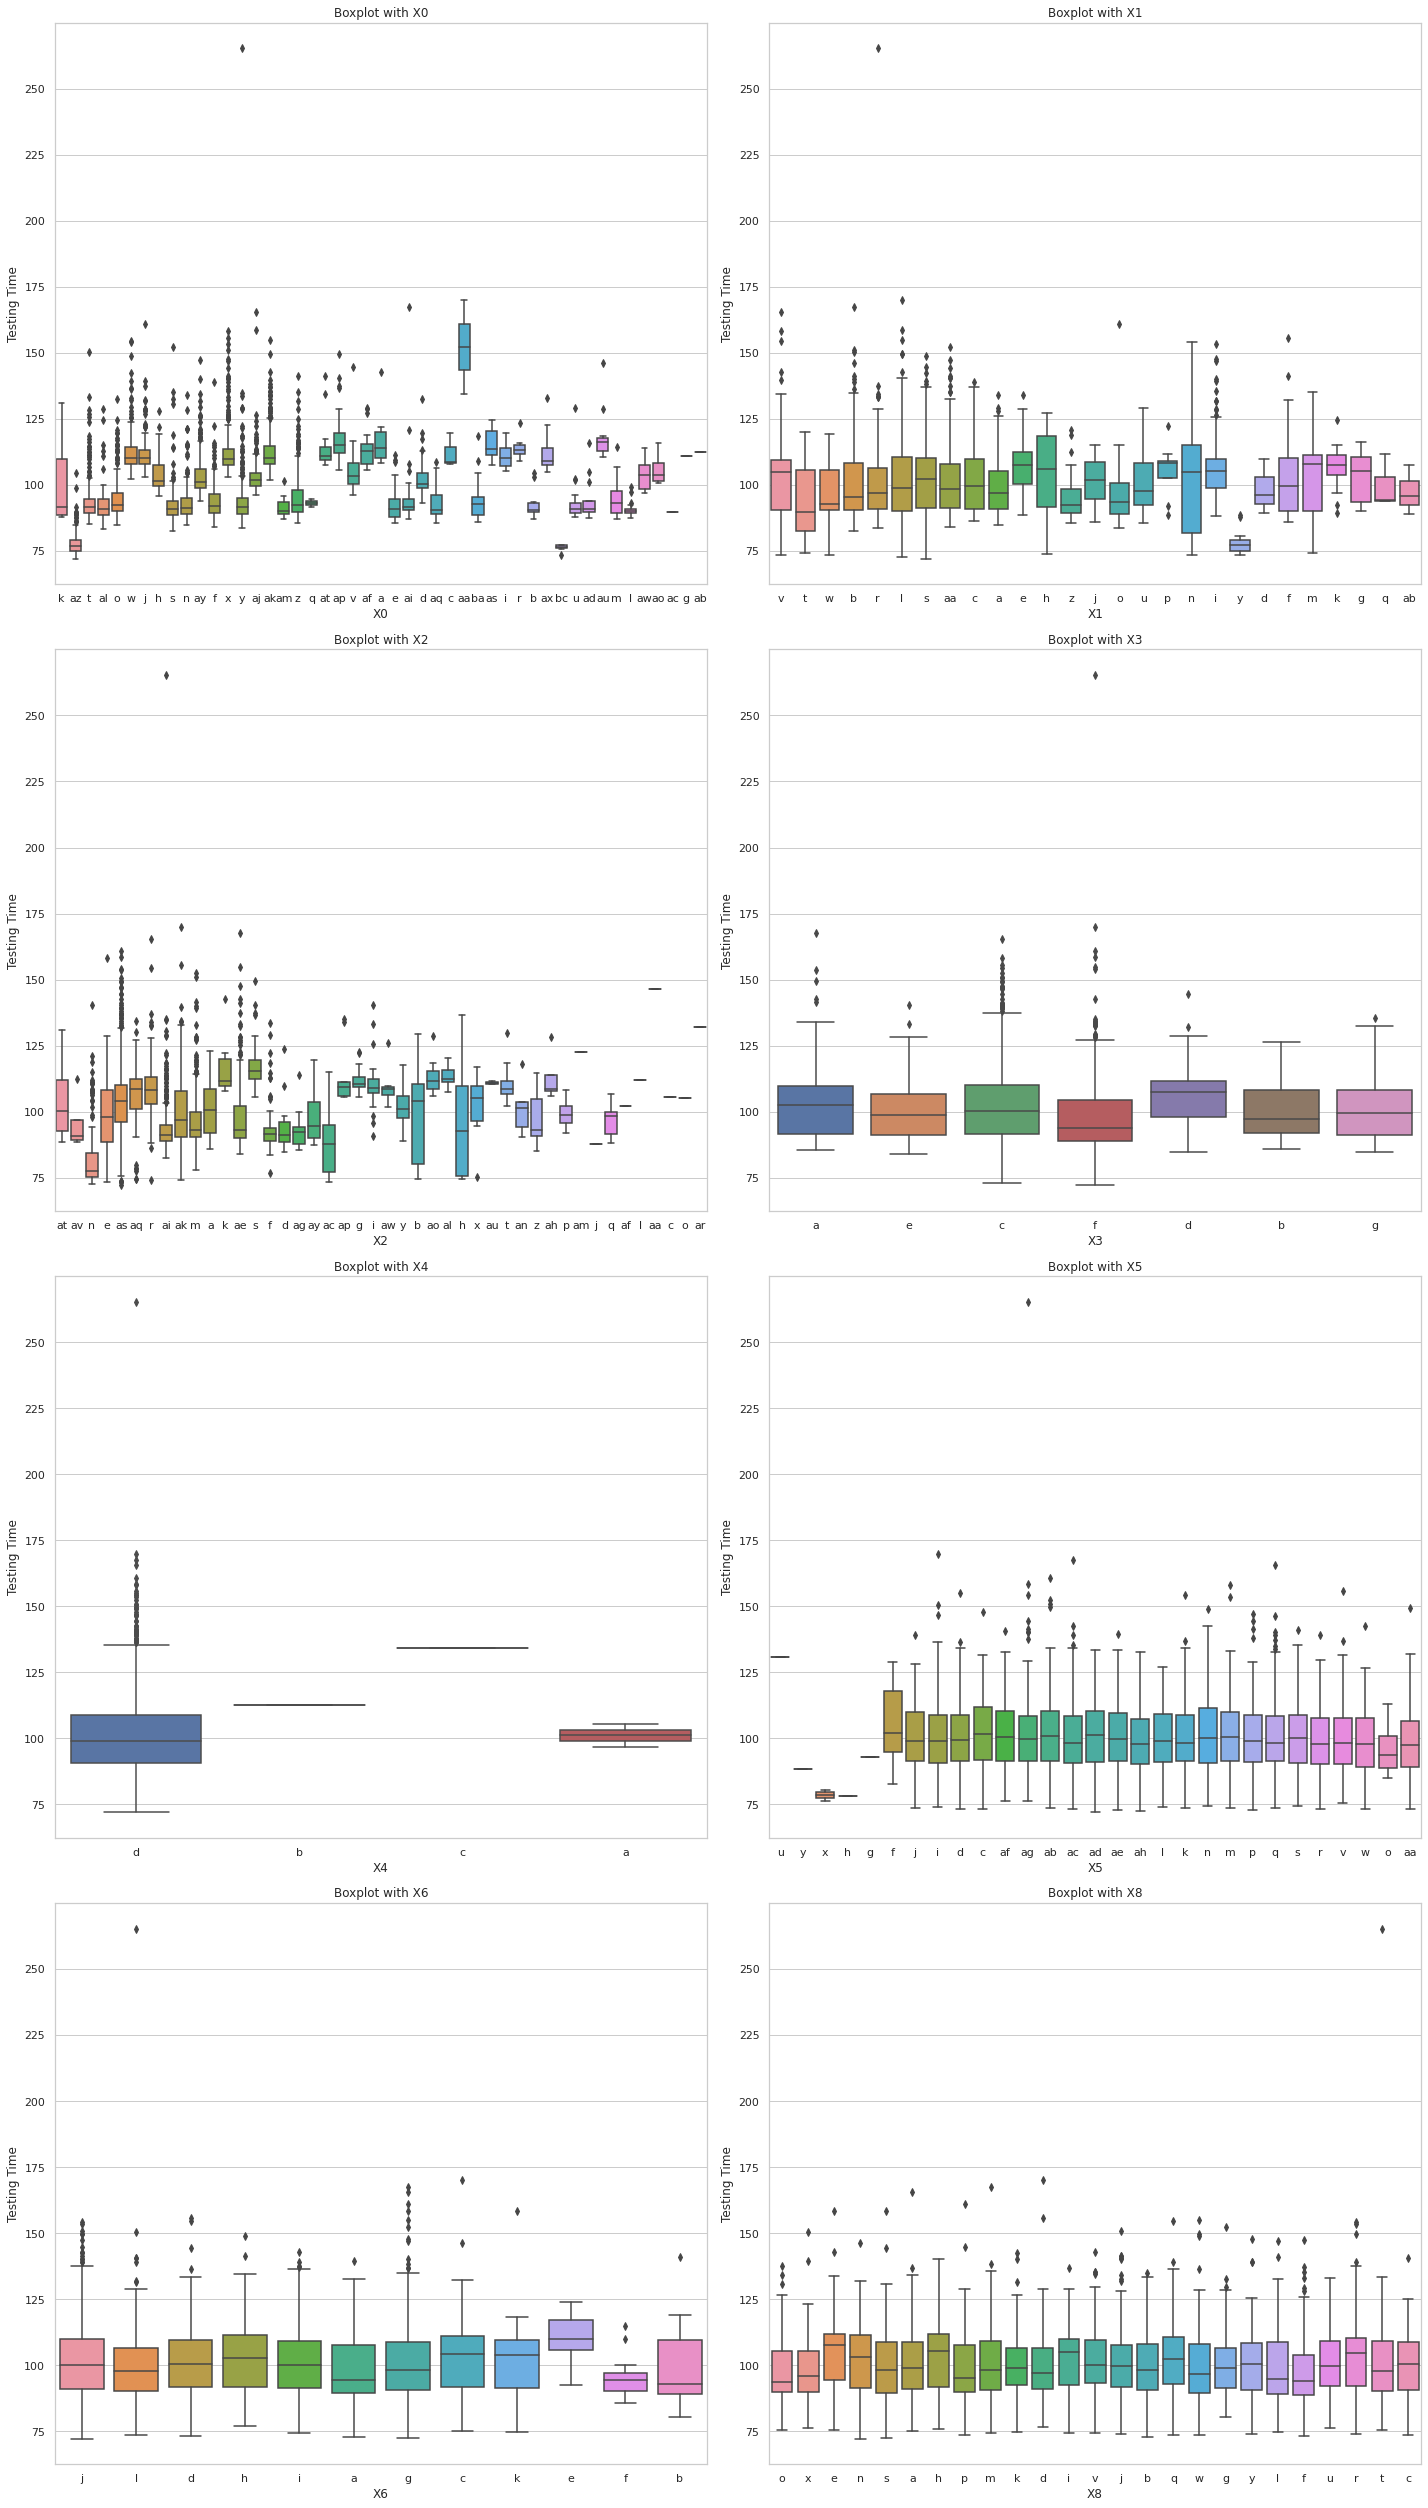

In [40]:
#another simple way to get the boxplots of y versus the cat features
fig = plt.figure(figsize=(20, 35))
for index, col in enumerate(train_cat_features):
    plt.subplot(4, 2, index+1)
    sns.boxplot(data=train, x=col, y='y') 
    plt.ylabel('Testing Time')
    plt.title('Boxplot with '+col)
      
plt.tight_layout()    
plt.show()

In [41]:
#check the frequencies of unique values in X4
train['X4'].value_counts().sort_values(ascending=False)

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

***More than 99% of the X4 has the value d. Probably this is one of the default or prominent feature in the car under X4***

In [42]:
#check the frequencies of unique values in X3
train['X3'].value_counts().sort_values(ascending=False)

c    1942
f    1076
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

***In the case of X3 the frequencies are across all the unique values.***

### *Visualize the occurrences of 0 and 1's in one of the binary numerical feature*


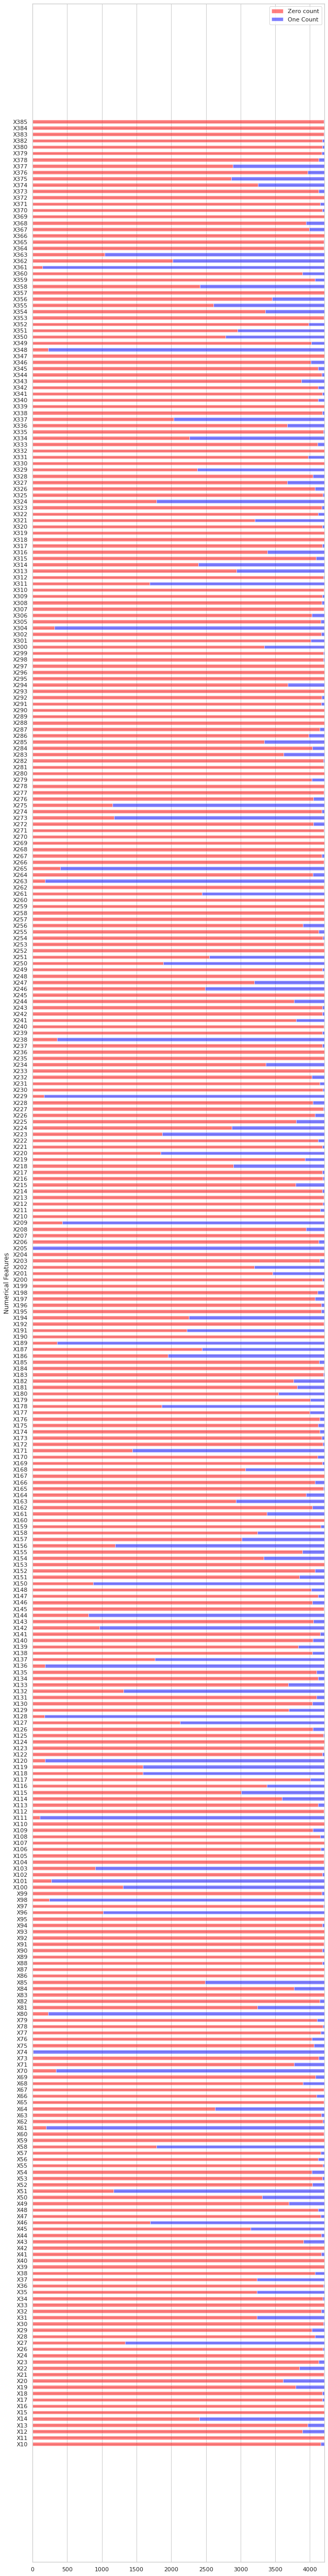

In [43]:
#stacked bar graph of all binary numerical features 
zero_count = []
one_count = []
for col in train_int_features:
    zero_count.append((train[col]==0).sum())
    one_count.append((train[col]==1).sum())

N = len(train_int_features)
ind = np.arange(N)
width = 0.55

plt.figure(figsize=(10,90))
p1 = plt.barh(ind, zero_count, width, color='red',alpha=0.5)
p2 = plt.barh(ind, one_count, width, left=zero_count, color='blue',alpha=0.5)
plt.yticks(ind, train_int_features)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.ylabel('Numerical Features')
plt.show()

***The majority of the binary numerical features appear to be having more 0's than 1's.In fact most of the features have skewed occurrences of 0 and 1. The features where the variance is 0 is still reflected in this view as these are not yet removed from the dataset.*** 

There are columns which have near to 0 variance. First, remove all the features which have exactly 0 variance.

## *Data Cleaning*

### *Remove all the variables with variance 0*

In [44]:
#features with 0 variance
print('Features with ZERO variance in the train set')
print(train_zero_var_features)

Features with ZERO variance in the train set
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [45]:
orig_train = train.copy()
orig_test = test.copy()

In [46]:
#drop the features from the train and test set
train.drop(train_zero_var_features,axis=1,inplace=True)
test.drop(train_zero_var_features,axis=1,inplace=True)

In [47]:
#revert the datatype of ID to original in the train and test dataset
train['ID'] =  train['ID'].astype('int64')

In [48]:
test['ID'] = test['ID'].astype('int64')

In [49]:
#save the cleaned dataset to a separate csv file
train.to_csv('train_clean.csv',index=False)
test.to_csv('test_clean.csv',index=False)

In [50]:
train.shape

(4209, 366)

In [51]:
test.shape

(4209, 365)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 366 entries, ID to X385
dtypes: float64(1), int64(357), object(8)
memory usage: 11.8+ MB
